<a href="https://colab.research.google.com/github/SohilaArafa/Image-Processing/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import cv2
import math
import numpy as np
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [7]:
img = cv2.imread('fruits.jpg')

In [8]:
z = img.reshape((-1,3))

In [11]:
z = np.float32(z)

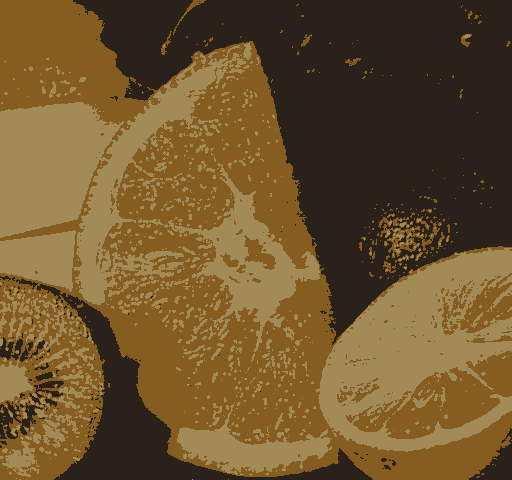

In [14]:
criteria  = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER ,10,1.0)
k= 3
ret,label,center=cv2.kmeans(z,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2_imshow(res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

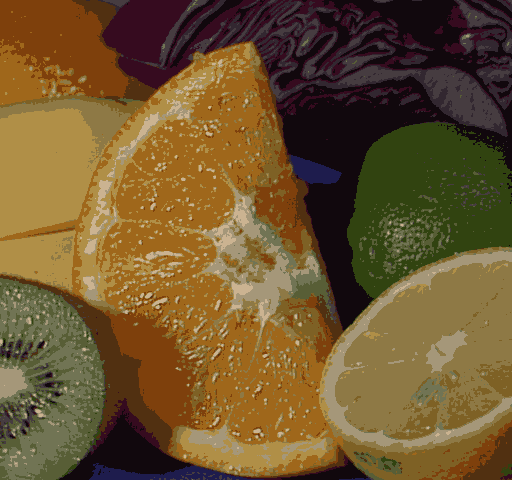

In [16]:
img2 = cv2.imread('fruits.jpg')
z = img2.reshape((-1,3))
z = np.float32(z)
criteria  = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER ,10,1.0)

k2= 16
ret,label,center=cv2.kmeans(z,k2,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img2.shape))
cv2_imshow(res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
image =  cv2.imread('city.jpg')

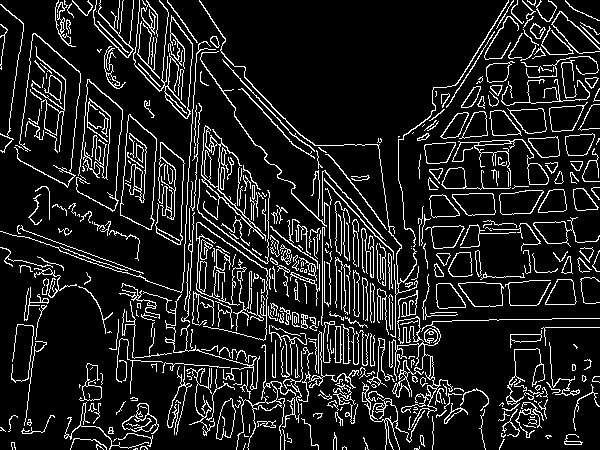

In [19]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gray , 100 , 200)
cv2_imshow(canny)

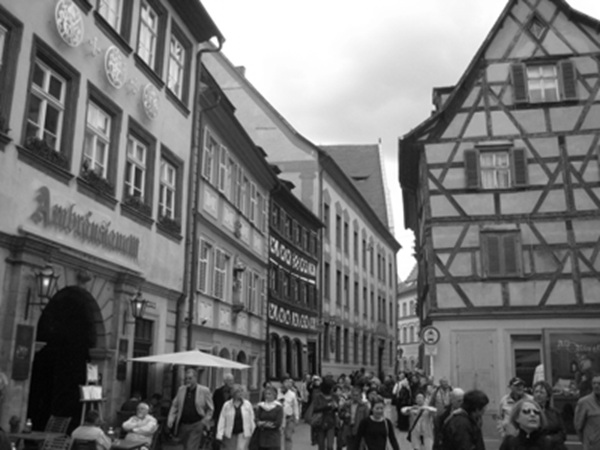

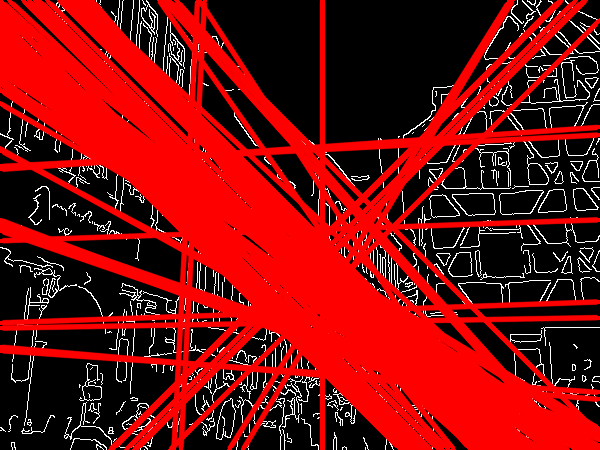

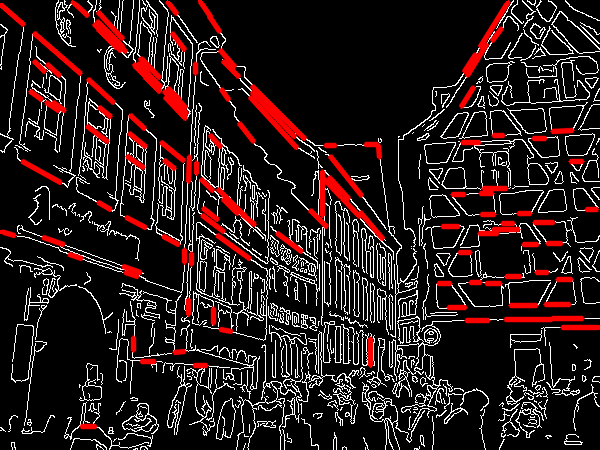

In [24]:
dst = cv2.Canny(gray , 100 , 200)

   
   # Copy edges to the images that will display the results in BGR
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)
   
lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)


linesP = cv2.HoughLinesP(dst, 1, np.pi / 180, 100, 50, 10)

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

cv2_imshow( gray)
cv2_imshow( cdst)
cv2_imshow(cdstP)